In [1]:
# Multi-Label Image Classification in Python
# In this project, we are going to train our model on a set of labeled movie posters. The model will predict the genres of the movie based on the movie poster. We will consider a set of 25 genres. Each poster can have more than one genre.

# What is multi-label classification?
# In multi-label classification, the training set is composed of instances each associated with a set of labels, and the task is to predict the label sets of unseen instances through analyzing training instances with known label sets.
# Multi-label classification and the strongly related problem of multi-output classification are variants of the classification problem where multiple labels may be assigned to each instance.
# In the multi-label problem, there is no constraint on how many of the classes the instance can be assigned to.
# Multiclass classification makes the assumption that each sample is assigned to one and only one label whereas Multilabel classification assigns to each sample a set of target labels.

In [30]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
print(tf.__version__)

2.3.0-rc0


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [32]:
data = pd.read_csv('train.csv')
data.shape

(7254, 27)

In [33]:
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
img_width = 350
img_height = 350

X = []
for i in tqdm(range(6500)):
    path = 'Images/' + data['Id'][i] + '.jpg'
    img = image.load_img(path, target_size=(img_width, img_height, 3))
    img = image.img_to_array(img)
    img = img/255.0
    X.append(img)

X = np.array(X)

100%|█████████████████████████████████████████████████████████████████████████████| 6500/6500 [00:38<00:00, 170.57it/s]


MemoryError: Unable to allocate 8.90 GiB for an array with shape (6500, 350, 350, 3) and data type float32

In [ ]:
data.shape[0]

In [ ]:
X.shape

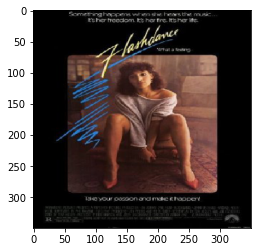

In [9]:
plt.imshow(X[1])

In [10]:
data['Genre'][1]

"['Drama', 'Romance', 'Music']"

In [11]:
# Now we will prepare the dataset. We have already got the feature space in X. Now we will get the target in y. For that, we will drop the Id and Genre columns from data.

In [15]:
y = data.drop(['Id', 'Genre'], axis = 1)
y = y.to_numpy()
y.shape

(7254, 25)

In [16]:
y=y[:6001]

In [17]:
y.shape

(6001, 25)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.15)

In [19]:
X_train[0].shape

(350, 350, 3)

In [20]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(25, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 174, 174, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 86, 86, 32)        0

In [22]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
160/160 [==============================] - 659s 4s/step - loss: 0.7549 - accuracy: 0.0894 - val_loss: 0.4355 - val_accuracy: 0.0610
Epoch 2/5
160/160 [==============================] - 653s 4s/step - loss: 0.3646 - accuracy: 0.2324 - val_loss: 0.3166 - val_accuracy: 0.1831
Epoch 3/5
160/160 [==============================] - 646s 4s/step - loss: 0.2681 - accuracy: 0.2998 - val_loss: 0.3050 - val_accuracy: 0.1831
Epoch 4/5
160/160 [==============================] - 638s 4s/step - loss: 0.2552 - accuracy: 0.3035 - val_loss: 0.2819 - val_accuracy: 0.1831
Epoch 5/5
160/160 [==============================] - 638s 4s/step - loss: 0.2476 - accuracy: 0.3280 - val_loss: 0.2511 - val_accuracy: 0.1920


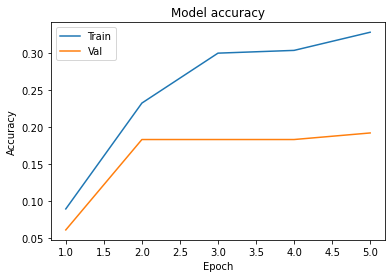

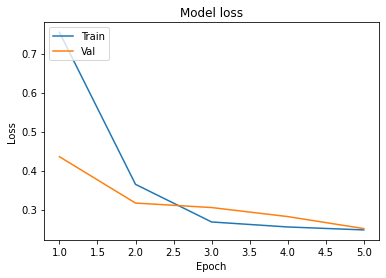

In [23]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

plot_learningCurve(history, 5)

In [24]:
img = image.load_img('saaho.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[2:]
print(classes)
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

SyntaxError: invalid syntax (<ipython-input-24-463d7681b732>, line 14)